In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data['Class']==1]

In [7]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

In [8]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [11]:
legit_sample = legit.sample(n=492)

In [12]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [13]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
97938,66448.0,-1.019416,0.892983,2.554140,0.088001,-0.687135,-0.169633,0.059203,0.250769,0.547284,...,-0.126162,-0.054138,-0.247717,0.414720,0.265980,0.373439,0.406853,0.197174,6.15,0
166101,117864.0,-0.215051,-0.021502,0.290506,-3.168545,0.038298,-1.003567,0.453636,-0.234217,-2.489665,...,-0.301198,-0.491562,-0.086103,0.673263,-0.019773,-0.433302,0.329894,0.197781,8.56,0
7762,10820.0,-1.615325,0.346875,-0.147872,-1.089688,-4.917660,2.278146,6.988377,-2.104665,2.023255,...,-1.111764,-0.562018,-0.215164,0.446790,-0.245641,0.570353,0.794068,-0.897788,1228.99,0
254858,156947.0,2.364313,-1.047453,-1.242719,-1.564345,-1.014297,-1.379598,-0.662309,-0.508777,-1.745777,...,0.075064,0.797219,0.069615,0.093091,0.133916,0.065619,-0.003300,-0.060890,0.01,0
46095,42638.0,-1.160903,1.151422,-0.918765,0.872705,-0.085144,-0.277674,0.202334,0.899959,-0.761588,...,0.221992,0.617456,0.039441,-0.309553,-0.723957,-0.370495,0.412846,0.013050,89.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [15]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91639.306911,-0.134667,-0.174184,-0.061661,-0.080709,-0.117506,-0.020743,0.001310,-0.031345,0.049793,...,-0.070033,-0.054732,-0.034782,-0.054752,0.000137,0.001915,-0.004713,-0.044647,0.049150,106.972093
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

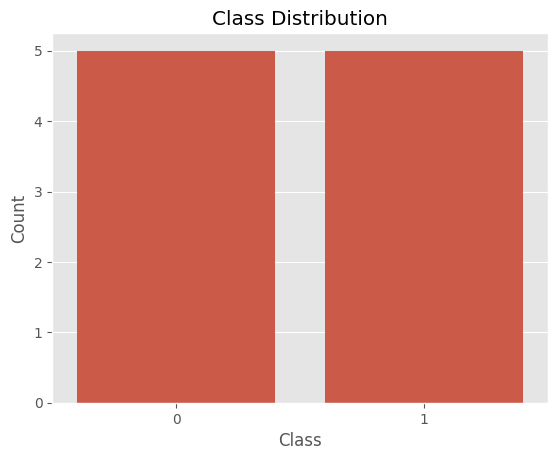

In [40]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample credit card data
credit_card_data = pd.DataFrame({
    'Class': ['0', '1', '0', '1', '0', '1', '0', '1', '0', '1']  # Example data
})

# Create the count plot
sns.countplot(x='Class', data=credit_card_data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [16]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

<b>Model Training</b>

In [18]:
model=LogisticRegression()

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your dataset here (replace with your actual data)
# For example: data = pd.read_csv('your_data.csv')
# X = data.drop('Class', axis=1)  # Features
# y = data['Class']  # Target variable

# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with increased max_iter and different solver
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)  # Increased max_iter
log_reg.fit(X_train_scaled, y_train)  # Use y_train instead of Y_train
y_pred_log_reg = log_reg.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")  # Use y_test instead of Y_test

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree.predict(X_test_scaled)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree)}")  # Use y_test instead of Y_test

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_scaled, y_train)
y_pred_forest = random_forest.predict(X_test_scaled)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_forest)}")  # Use y_test instead of Y_test

# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")  # Use y_test instead of Y_test

Logistic Regression Accuracy: 0.9985253326779256
Decision Tree Accuracy: 0.996892665285629
Random Forest Accuracy: 0.9985253326779256
SVM Accuracy: 0.9985253326779256


<b>Undersampling</b>

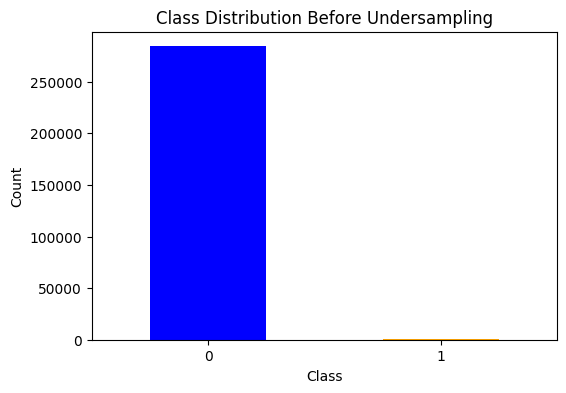

Class distribution after undersampling:
Class
0    362
1    362
Name: count, dtype: int64


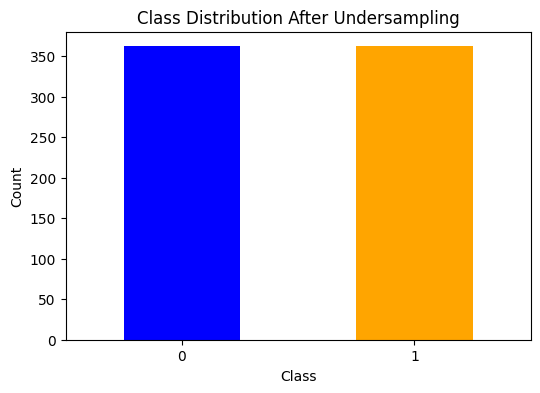


Accuracy: 0.468206874758611

Confusion Matrix:
 [[39936 45377]
 [   61    69]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64     85313
           1       0.00      0.53      0.00       130

    accuracy                           0.47     85443
   macro avg       0.50      0.50      0.32     85443
weighted avg       1.00      0.47      0.64     85443



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a sample dataset based on the provided class distribution
data = pd.DataFrame({
    'Feature1': np.random.rand(284807),  # 284,807 random values for Feature1
    'Feature2': np.random.rand(284807),  # 284,807 random values for Feature2
    'Class': [0] * 284315 + [1] * 492   # 284,315 of class '0' and 492 of class '1'
})

# Visualize class distribution before undersampling
plt.figure(figsize=(6, 4))
data['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution Before Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Split the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check class distribution after undersampling
print("Class distribution after undersampling:")
print(y_resampled.value_counts())

# Visualize class distribution after undersampling
plt.figure(figsize=(6, 4))
y_resampled.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Logistic Regression with undersampled data
log_reg = LogisticRegression(solver='saga', max_iter=500)
log_reg.fit(X_resampled, y_resampled)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


<b>Oversampling</b>

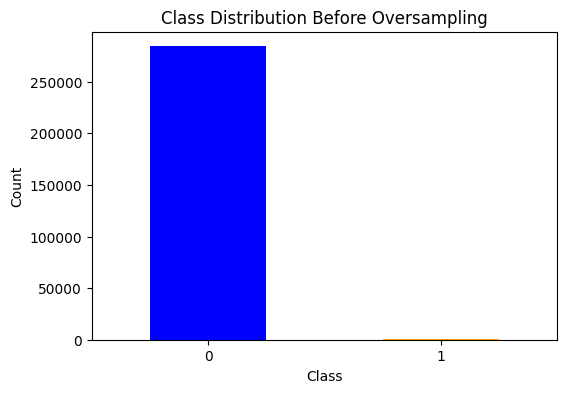

Class distribution after oversampling:
Class
0    199002
1    199002
Name: count, dtype: int64


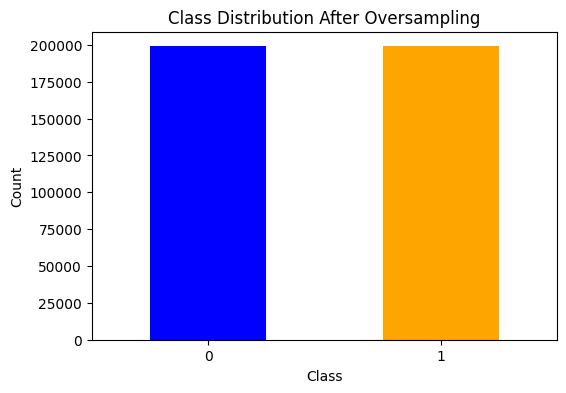


Accuracy (Oversampling): 0.5065482251325445

Confusion Matrix (Oversampling):
 [[43213 42100]
 [   62    68]]

Classification Report (Oversampling):
               precision    recall  f1-score   support

           0       1.00      0.51      0.67     85313
           1       0.00      0.52      0.00       130

    accuracy                           0.51     85443
   macro avg       0.50      0.51      0.34     85443
weighted avg       1.00      0.51      0.67     85443



In [25]:
from imblearn.over_sampling import RandomOverSampler

# Visualize class distribution before oversampling
plt.figure(figsize=(6, 4))
data['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution Before Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Apply RandomOverSampler to balance the classes
ros = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = ros.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print("Class distribution after oversampling:")
print(y_resampled_over.value_counts())

# Visualize class distribution after oversampling
plt.figure(figsize=(6, 4))
y_resampled_over.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Logistic Regression with oversampled data
log_reg_over = LogisticRegression(solver='saga', max_iter=500)
log_reg_over.fit(X_resampled_over, y_resampled_over)

# Predictions
y_pred_over = log_reg_over.predict(X_test)

# Evaluation
print("\nAccuracy (Oversampling):", accuracy_score(y_test, y_pred_over))
print("\nConfusion Matrix (Oversampling):\n", confusion_matrix(y_test, y_pred_over))
print("\nClassification Report (Oversampling):\n", classification_report(y_test, y_pred_over))
